In [1]:
from keras.utils import np_utils
from PIL import Image
import os,sys
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from array import array
import numpy as np 
import matplotlib.pyplot as plot
import pandas as pd

Using TensorFlow backend.


In [2]:
train2 = pd.read_csv('C1-P1_Train_Dev/train.csv')

In [3]:
#train2

In [4]:
trainarray2 = train2.values

In [5]:
#trainarray2[:]

In [6]:
#trainarray2[:,0]

In [7]:
#trainarray2[:,1]

In [8]:
array_label = trainarray2[:,1]

In [9]:
array_label

array(['C', 'C', 'B', ..., 'A', 'A', 'C'], dtype=object)

In [10]:
array_label[array_label == 'A' ] = 0
array_label[array_label == 'B' ] = 1
array_label[array_label == 'C' ] = 2

In [11]:
format(array_label)

'[2 2 1 ... 0 0 2]'

In [12]:
array_label

array([2, 2, 1, ..., 0, 0, 2], dtype=object)

In [13]:
label_list = array_label.tolist()

In [14]:
#label_list 

In [15]:
row,column = 64,64
X_train = [] 
Y_train = []

#X_testdata  = []
classes =  3

In [16]:
pathResizedTrainDataBomei_0 = 'C:/pywork/contest/C1-P1_Train_Dev/resize_train/'
listingDog_0 = os.listdir(pathResizedTrainDataBomei_0)

In [17]:
for file in listingDog_0 :
     if file != '.DS_Store' :
        img = Image.open(pathResizedTrainDataBomei_0 + file)
        #print(file)
        x = img_to_array(img)
        #print(x)
        X_train.append(x)
        #print(X_train)
Y_train.append(label_list) # bomei
#print(Y_train)

In [18]:
X_train = np.array(X_train, dtype=np.float32)

In [19]:
#X_train

In [20]:
X_train_normalize = X_train / 255.0

In [21]:
see = X_train_normalize[0]*255
new_im = Image.fromarray(see.astype(np.uint8))


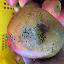

In [22]:
new_im

In [23]:
total_input = len(X_train)

In [24]:
Y_train = np.array(Y_train)

In [25]:
Y_train = Y_train.reshape(total_input, 1)

In [26]:
Y_train 

array([[2],
       [2],
       [1],
       ...,
       [0],
       [0],
       [2]])

In [27]:
permutation = np.random.permutation(Y_train.shape[0])
shuffled_dataset = X_train_normalize[permutation,:,:]
shuffled_labels  = Y_train[permutation]

In [28]:
shuffled_labels

array([[2],
       [0],
       [0],
       ...,
       [0],
       [2],
       [0]])

In [29]:
shuffled_labels_OneHot = np_utils.to_categorical(shuffled_labels)

In [30]:
shuffled_labels_OneHot[:10]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D,ZeroPadding2D

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),
                 activation='relu',padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [34]:
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
model.add(Conv2D(filters=128,kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [36]:
model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(rate=0.3))

In [37]:
model.add(Dense(3,activation='softmax'))

In [38]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
__________

In [39]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [40]:
train_history=model.fit(shuffled_dataset,shuffled_labels_OneHot,
                        validation_split=0.2,
                        epochs=25,batch_size=150,verbose=2)

Train on 4480 samples, validate on 1120 samples
Epoch 1/25
 - 79s - loss: 1.1806 - acc: 0.3600 - val_loss: 1.0888 - val_acc: 0.3473
Epoch 2/25
 - 76s - loss: 1.0513 - acc: 0.4469 - val_loss: 1.0131 - val_acc: 0.4884
Epoch 3/25
 - 80s - loss: 0.9653 - acc: 0.5056 - val_loss: 0.9824 - val_acc: 0.5080
Epoch 4/25
 - 80s - loss: 0.9233 - acc: 0.5304 - val_loss: 0.9180 - val_acc: 0.5545
Epoch 5/25
 - 77s - loss: 0.9151 - acc: 0.5458 - val_loss: 0.9209 - val_acc: 0.5741
Epoch 6/25
 - 80s - loss: 0.8895 - acc: 0.5600 - val_loss: 0.9315 - val_acc: 0.5437
Epoch 7/25
 - 81s - loss: 0.8724 - acc: 0.5734 - val_loss: 0.8895 - val_acc: 0.5902
Epoch 8/25
 - 84s - loss: 0.8606 - acc: 0.5853 - val_loss: 0.8968 - val_acc: 0.5911
Epoch 9/25
 - 80s - loss: 0.8531 - acc: 0.5862 - val_loss: 0.8686 - val_acc: 0.6000
Epoch 10/25
 - 86s - loss: 0.8317 - acc: 0.6042 - val_loss: 0.8779 - val_acc: 0.5920
Epoch 11/25
 - 81s - loss: 0.8067 - acc: 0.6277 - val_loss: 0.8613 - val_acc: 0.5857
Epoch 12/25
 - 91s - loss:

In [41]:
import matplotlib.pyplot as plot
def show_train_history(train_history,train,validation):
    plot.plot(train_history.history[train])
    plot.plot(train_history.history[validation])
    plot.title('Train History')
    plot.ylabel(train)
    plot.xlabel('Epoch')
    plot.legend(['train','validation'],loc='upper left')
    plot.show()

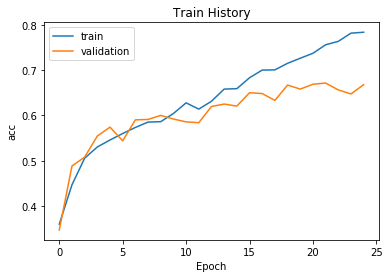

In [42]:
show_train_history(train_history,'acc','val_acc')

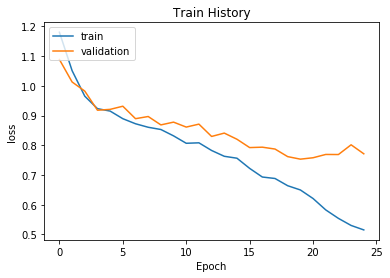

In [43]:
show_train_history(train_history,'loss','val_loss')